### Exercise 2.2

k-armed bandit with $k=4$. Given a sequence of actions and rewards, if action $A_{i+1} = \underset{a}{\operatorname{argmax}} Q_i(a)$, then $A_{i+1}$ can be greedy or exploration. However if $A_{i+1} \neq \underset{a}{\operatorname{argmax}} Q_i(a)$,  then $A_{i+1}$ can only be exploration.

Given a list of $\{(A_i, R_i)\} = \{ (1,-1), (2, 1), (2, -2), (2, 2), (3, 0) \}$, we can get the $Q_i(a)$ using sample-average estimate.

| Action      | Q1 | Q2 | Q3 | Q4 |
| ----------- | ---| ---| ---| ---|
|  -          | 0  |  0 |  0 | 0  |
|  $A_1$    | -1  |  0 |  0 | 0  |
|  $A_2$    | -1  |  1 |  0 | 0  |
|  $A_3$    | -1  |-0.5|  0 | 0  |
|  $A_4$    | -1  | 0.5|  0 | 0  |
|  $A_5$    | -1  | 0.5|  0 | 0  |
 
As we can see,  

$A_1=1 \in \{1,2,3,4\}= \underset{a}{\operatorname{argmax}} [0, 0, 0, 0]$ therefore might be greedy/exploration

$A_2=2 \in \{2\}= \underset{a}{\operatorname{argmax}} [-1, 1, 0, 0]$ therefore might be greedy/exploration

$A_3=2 \notin \{3,4\}= \underset{a}{\operatorname{argmax}} [-1, -0.5, 0, 0]$ therefore must be exploration

$A_4=2 \in \{2\}= \underset{a}{\operatorname{argmax}} [-1,  0.5, 0, 0]$ therefore might be greedy/exploration

$A_5=3 \notin \{2\} = \underset{a}{\operatorname{argmax}}[ -1, 0.5, 0, 0]$ therefore must be exploration

### Exercise 2.3
In the long run, $\epsilon = 0.01$ will perform the best. $E[R] = \epsilon E[R_e] + (1 - \epsilon) E[R_g]$ where $R$ is the total reward, $R_e$ is the total exploration reward and $R_g$ is the total greedy reward.  Note that For any $\epsilon_1, \epsilon_2 > 0$, $\| E_{\epsilon_1} [R_g] - E_{\epsilon_2}[R_g] \| \rightarrow 0$ and greedy reward dominates exploration reward as $n$ goes to infinity, i.e $\frac{\|E[R_e]\|}{\|E[R_g]\|} \rightarrow 0$.

Therefore,  $\frac{E_{0.01}[R]}{E_{0.1}[R]} \rightarrow \frac{1 - 0.01}{1 - 0.1} = 110\% $.  $\epsilon = 0.01$ will perform about 10% better


### Exercise 2.4

Suppose step size $\alpha = a_n$,  then 
$$ 
\begin{align}
Q_{n+1} & = Q_n + a_n (R_n - Q_n) \\
& = a_n R_n + ( 1 - a_n) Q_n \\
& = a_n R_n + (1 - a_n) [a_{n-1}R_{n-1} + (1 - a_{n-1})Q_{n-1}] \\
& = a_n R_n + (1 - a_n) a_{n-1}R_{n-1} + (1 - a_n) (1 - a_{n-1}) Q_{n-1} \\
& = \frac{A_n}{A_n} a_nR_n + \frac{A_n}{A_{n-1}} a_{n-1}R_{n-1} +  \frac{A_n}{A_{n-2}} a_{n-2}R_{n-2} + \cdots + \frac{A_n}{A_1}a_1R_1 + A_n Q_1 \;\; \left( \mbox{where } A_n = \prod^{n}_{i=1} (a_i - 1) \right) \\
& = A_n Q_1 + \sum^{n}_{i=1} \frac{A_n}{A_i}a_i R_i \\
& = A_n Q_1 + \sum^{n}_{i=1} \prod^{n}_{k=i}(a_k - 1)a_i R_i \\
\end{align}
$$

### Exercise 2.5

Running agents with sample-average methods and constant step size ($\alpha = 0.1$) with $\epsilon=0.1$ and game rounds of 10,000 steps. We get the following:

Populating the interactive namespace from numpy and matplotlib


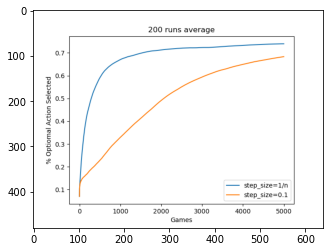

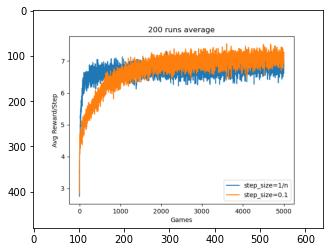

In [5]:
%pylab inline
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;
img = mpimg.imread('optimal_action_selected_nonstationary.png')
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread('avg_reward_nonstationary.png')
imgplot = plt.imshow(img)
plt.show()

As we can see, constant step size has disminishing weight for old reward which makes the algorithm better at adapting to non stationary distribution.

### Exercise 2.6
N/A

### Exercise 2.7

Note that $\bar{o}_n = \bar{o}_{n-1} + \alpha (1 - \bar{o}_{n-1}) $ can be transformed as $\frac{\bar{o}_n - 1}{\bar{o}_{n-1} - 1} = 1 - \alpha $ which gives $\bar{o}_n = (\bar{o}_0 - 1)(1-\alpha)^n + 1 = 1 - (1-\alpha)^n$

From exercise 2.4, given a step size of $b_n$,  
$ Q_{n+1} = B_nQ_1 + \sum^{n}_{i=1} \prod^{n}_{k=i}(b_k - 1)b_i R_i \left( \mbox{where } B_n = \prod^{n}_{i=1} (b_i - 1) \right)$

Now $b_n = \frac{\alpha}{\bar{o}_n} = \frac{\alpha}{1 - (1-\alpha)^n}$

We want to show $B_n=0$ which means $Q_{n+1}$ doesn't depend on $Q_1$. $B_n =  \prod^{n}_{i=1} (b_i - 1) = \prod^{n}_{i=1} \frac{-(1-\alpha) + (1-\alpha)^i}{1 - (1-\alpha)^i} = \prod^{n}_{i=1} \frac{-\gamma + \gamma^i}{1 - \gamma^i} = - \gamma \prod^{n}_{i=1} \frac{1 - \gamma^{i-1}}{1 - \gamma^i}$ where $\gamma = 1- \alpha$ 

Note when $i=1$, the first term of the product is 0. Therefore $B_n = 0$